# HIV Model

In [277]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *

In [278]:
step = 18

def make_system(Gamma, mu, tau, Beta, rho, alpha, sigma, delta, pi):
    """
    Gamma: rate at which uninfected CD4 lymphocytes arise
    mu: HIV-independent death rate of uninfected lymphocytes
    tau: proportion of cells activated
    Beta: rate of infection of CD4 lymphocytes per virion
    rho: proportion of cells becoming latently infected upon infection
    alpha: activation rate of latently infected cells
    sigma: removal rate of cell-free virus
    delta: removal rate of actively infected CD4
    
    """
    init = State(R = 1000, L = 0 , E = 0 , V = 4e-7)
    t0 = 0
    t_end = 120 * step
    
    return System(init = init, t0 = t0, t_end = t_end, 
                  Gamma = Gamma/step, mu = mu/step, tau = tau/step, 
                  Beta = Beta/step, rho = rho/step, alpha = alpha/step, 
                  sigma = sigma/step, delta = delta/step, pi = pi/step)


In [279]:
system = make_system(1.36, 1.36e-3, 0.2, 2.7e-4, 0.1, 3.6e-2,2,0.33,100)

,values
init,R 1.000000e+03 L 0.000000e+00 E 0.000...
t0,0
t_end,2160
Gamma,0.0755556
mu,7.55556e-05
tau,0.0111111
Beta,1.5e-05
rho,0.00555556
alpha,0.002
sigma,0.111111


In [280]:
def update_function(state, t, system):
    """
    Update the HIV Model
    state: State (r, l, e, v)
    t: time
    system: System object
    
    returns: State (r, l, e, v)
    """
    unpack(system)
    
    r, l, e, v = state
    
    uninfected = Gamma * tau - mu * r - Beta * r * v
    latent = rho * Beta * r * v - mu * l - alpha * l
    active = (1 - rho) * Beta * r * v + alpha * l - delta * e
    virions = pi * e - sigma * v
    
    r += uninfected
    l += latent
    e += active
    v += virions
#    print('r: ',r, 'l: ',l ,'e: ', e,'v: ', v)
    
    return State(R = r, L = l, E = e, V = v)

In [281]:
def plot_results(r, l, e, v):
    plot(l, '--', label = 'uninfected')
    plot(r, '-', label = 'latent')
    plot(e,':', label = 'active')
 #   plot(v, '.', label = 'free virions')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [282]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    return frame

In [283]:
results = run_simulation(system, update_function);
results.index = results.index/step

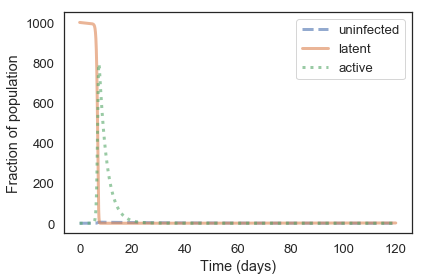

In [284]:
plot_results(results.R, results.L, results.E, results.V)

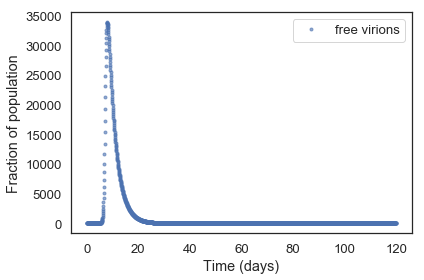

In [285]:
plot(results.V, '.', label = 'free virions')
decorate(xlabel='Time (days)',
       ylabel='Fraction of population')